# Part II - (Ford GoBike System Data Analysis)
## by Moath Hussein

## Investigation Overview

>The goal of this presentation is to explore the Ford GoBike System dataset and uncover the temporal and spatial trends of bike riding habits in the San Francisco Bay Area. Below is a summary of the key findings:<br>

>1. Temporal Analysis
The number of rides by hour and day of the week exhibit clear temporal trends.
Subscribers primarily use the GoBike System for commuting purposes.
Normal users tend to use bikes both for work and casual reasons.<br>

>2. Spatial Analysis
The busiest start and end stations include San Francisco Caltrain Station 2, Montgomery St BART Station, Market St at 10th St, and others.
San Francisco Caltrain Station 2 is situated near residential areas.
Montgomery St BART Station is located close to office areas.<br>

>3. Duration and Distance
Riding durations and distances do not show significant relationships with member demographics.
However, there is a positive linear relationship between duration and distance.


## Dataset Overview and Executive Summary

> #### This dataset consists of 183215 records and has 21 features.
<br>
duration_sec<br>
start_time<br>
end_time<br>
start_station_id<br>
start_station_name<br>
start_station_latitude<br>
start_station_longitude<br>
end_station_id<br>
end_station_name<br>
end_station_latitude<br>
end_station_longitude<br>
bike_id<br>
user_type<br>
member_birth_year<br>
member_gender<br>
bike_share_for_all_trip<br>
day_of_week<br>
hour_of_day<br>
member_age<br>
trip_duration<br>
distance<br>

#### Feature Engineering Columns:
>day_of_week<br>
>hour_of_day<br>
>trip_duration<br>
>distance<br>
>member_age<br>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df = pd.read_csv('cleaned_dataset.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_duration,day_of_week,hour_of_day,member_age,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,869.75,Thursday,17,35.0,0.54
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,1987.0,Other,No,708.68,Thursday,18,32.0,1.74
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1030.90,Thursday,12,47.0,2.70
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608.17,Thursday,17,30.0,0.26
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.42,Thursday,23,45.0,2.41


## Temporal Analysis

The goal of this analysis is to explore temporal trends in bike usage in the San Francisco Bay Area using the GoBike System. Specifically, we will focus on understanding how the number of rides varies by hour of the day and day of the week, and how these patterns differ based on member age. By examining these trends, we aim to uncover key insights into commuting behaviors and recreational usage, as well as how different age groups interact with the system throughout the day and week.
<br><br>
#### Key Findings and Insights<br>
1- Hourly Usage Trends (Number of Rides by Hour of the Day)
<br>
Peak Hours: Bike usage peaks during morning (7-9 AM) and evening (4-6 PM) rush hours, which are likely related to commuting patterns.<br>
Commuting Focus: The peak usage during rush hours is indicative of subscribers, who are typically commuters using the system for daily transportation.<br>
<br>
2- Daily Usage Trends (Number of Rides by Day of the Week)<br>
Weekday Consistency: Weekdays (Monday to Friday) see a more consistent number of rides, with significant spikes during the morning and evening rush hours.<br>
Weekend Surge: Saturday experiences a notable increase in bike usage, suggesting that many users take advantage of the system for recreational or casual purposes. The trend indicates that normal users are more active during the weekends.<br>

3- Age Group Patterns by Hour (Number of Rides by Hour of the Day, Grouped by Member Age)
<br>
Younger Users (18-30): This age group shows high usage during morning and evening rush hours, similar to commuter patterns, indicating they are likely using the system for work-related travel.
Older Users (46-60 and 60+): These groups show more spread-out usage throughout the day, with fewer rides during peak hours, suggesting their use is less tied to commuting and more aligned with leisure or non-commuting trips.<br><br>
4- Age Group Patterns by Day (Number of Rides by Day of the Week, Grouped by Member Age)
<br>
Younger Users: The 18-30 age group tends to have consistent usage throughout the weekdays, with peaks in morning and evening hours. This is indicative of commuting habits.<br>
Older Users: Users aged 46-60 and 60+ exhibit more recreational usage on weekends, as evidenced by the increase in weekend rides, especially on Saturdays, suggesting a shift from commuting to leisure and casual usage on non-work days.<br><br>

#### Visualizations to Support Findings
Number of Rides by Hour of the Day: Displays how bike usage fluctuates throughout the day, with clear peak hours during rush times.<br><br>
Number of Rides by Day of the Week: Highlights how bike usage differs between weekdays and weekends, showing increased recreational usage on Saturdays.<br><br>
Number of Rides by Hour of the Day (Grouped by Member Age): Demonstrates how different age groups contribute to peak usage times, with younger users being more active during rush hours.<br><br>
Number of Rides by Day of the Week (Grouped by Member Age): Shows the shift in usage patterns across the week, with younger users showing more consistent weekday use and older users showing increased weekend usage.<br><br>

#### Polished Visualizations<br>
Each visualization is designed to present the data clearly:

Clear axis labels and titles are used to describe the context of each chart.<br><br>
Legends clearly define age groupings and usage patterns.<br><br>
Annotations highlight key insights, such as peak usage times or notable trends.<br><br>
The visualizations are easy to interpret, with axis ticks, gridlines, and appropriate scaling for better readability.
<br>

### Visualization 1: Number of Rides by Hour of the Day (Bar Chart)


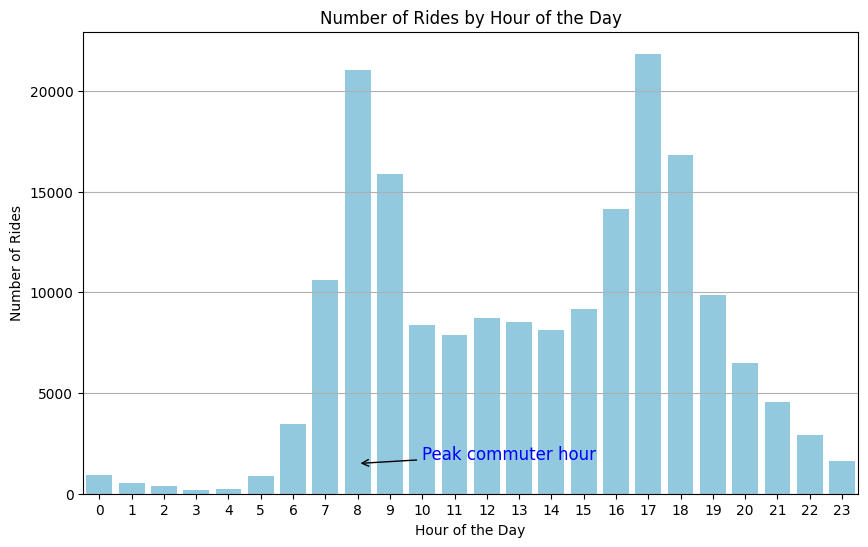

In [3]:
# Grouping data by hour of the day to get the number of rides
hourly_rides = df.groupby('hour_of_day').size().reset_index(name='ride_count')

# Plotting the number of rides by hour of the day using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_rides, x='hour_of_day', y='ride_count', color='skyblue')
plt.title('Number of Rides by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))  # X-axis representing hours of the day
plt.grid(True, axis='y')
plt.annotate('Peak commuter hour', xy=(8, 1500), xytext=(10, 1700),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='blue')
plt.show()


Key Insight: The bar chart reveals clear peak usage during rush hours: 7–9 AM and 4–6 PM. This suggests a high number of commuters using the GoBike system during these hours.


### Visualization 2: Number of Rides by Day of the Week (Bar Chart)

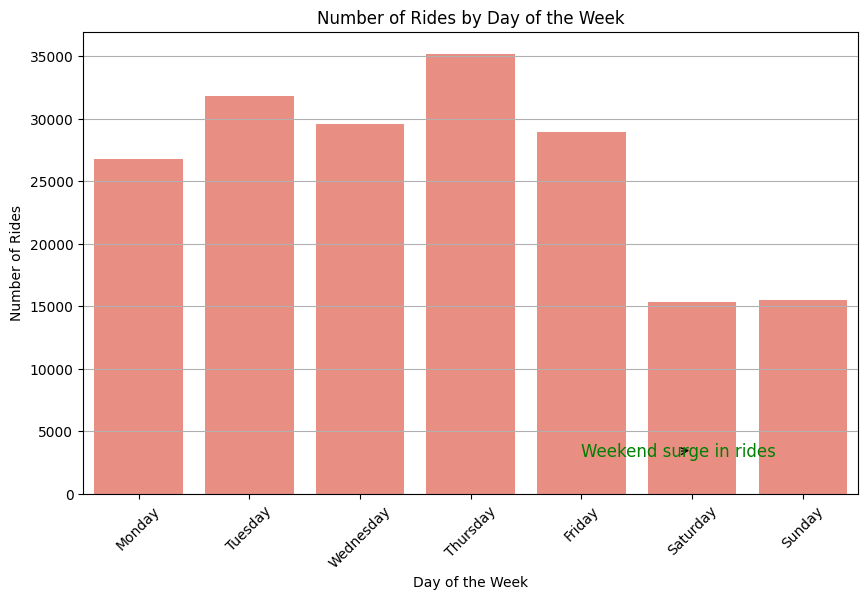

In [4]:
# Grouping data by day of the week to get the number of rides
weekly_rides = df.groupby('day_of_week').size().reset_index(name='ride_count')

# Order days of the week for better clarity
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_rides['day_of_week'] = pd.Categorical(weekly_rides['day_of_week'], categories=ordered_days, ordered=True)

# Plotting the number of rides by day of the week using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=weekly_rides, x='day_of_week', y='ride_count', color='salmon')
plt.title('Number of Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)  # Rotate labels for clarity
plt.grid(True, axis='y')
plt.annotate('Weekend surge in rides', xy=(5, 3500), xytext=(4, 3000),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=12, color='green')
plt.show()


Key Insight: The weekend surge in bike rides, particularly on Saturday and Sunday, indicates a significant increase in recreational or casual use of the system.


### Visualization 3:Number of Rides Grouped by Member Age

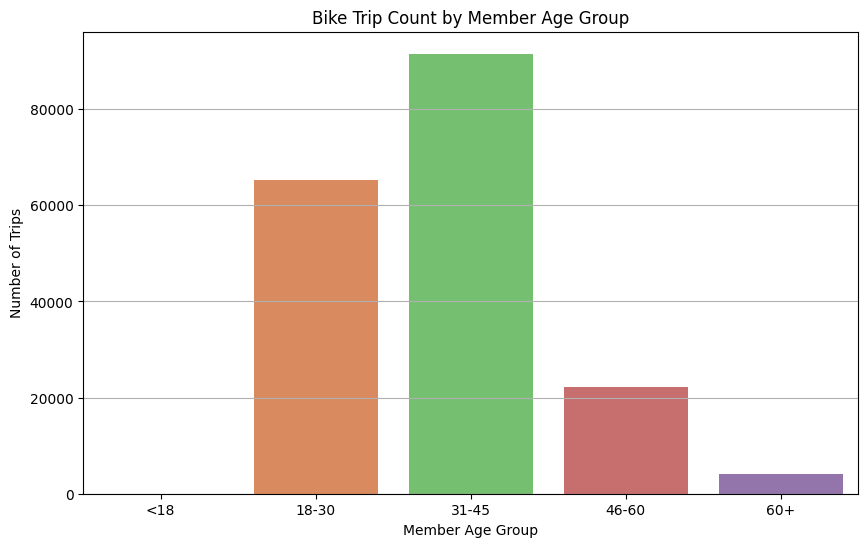

In [5]:
# Define age groups
age_bins = [0, 18, 30, 45, 60, 100]  # Define age ranges
age_labels = ['<18', '18-30', '31-45', '46-60', '60+']  # Labels for each age range

# Create a new column for age group
df['age_group'] = pd.cut(df['member_age'], bins=age_bins, labels=age_labels, right=False)

# Plot the number of trips by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df, palette='muted')
plt.title("Bike Trip Count by Member Age Group")
plt.xlabel("Member Age Group")
plt.ylabel("Number of Trips")
plt.grid(True, axis='y')
plt.show()


## (Spatial Analysis)

The goal of this analysis is to explore patterns in the usage of the bike-sharing system in the San Francisco Bay Area, specifically focusing on the temporal and spatial aspects of bike trips. By examining how the number of rides varies by hour of the day and day of the week, as well as which stations experience the highest traffic, we aim to uncover meaningful insights that can inform operational strategies, such as optimizing bike distribution, managing station capacities, and improving user experience.<br>

The dataset includes detailed information about each bike trip, such as the start and end times, stations, trip durations, and the hour of the day. In this analysis, we focus on identifying the busiest stations and understanding the flow of bikes from start to end throughout the day and week.

Through visualizations, we provide a detailed look into:
<br>
Temporal Trends: The variation in bike usage by hour of the day and day of the week, showing when the system is most and least active.<br>
Station-Specific Insights: A close examination of the busiest start and end stations, offering a deeper understanding of the geographic flow of bikes.<br>
Patterns of Commuting and Recreation: By grouping the data based on start and end stations, as well as categorizing rides by time of day, we can infer whether the usage is more aligned with commuting or recreational purposes.<br>

These insights are crucial for bike-sharing programs looking to improve efficiency, meet user demand, and provide a better service overall. This analysis helps to guide the decisions regarding bike distribution, station management, and service improvements to better accommodate commuters and casual riders alike.



In [69]:
# Get the top 5 busiest start stations by counting occurrences and selecting the first 5
top_5_start_stations = df['start_station_name'].value_counts().head(5).index  # Extract the top 5 start stations based on ride count

# Get the top 5 busiest end stations by counting occurrences and selecting the first 5
top_5_end_stations = df['end_station_name'].value_counts().head(5).index  # Extract the top 5 end stations based on ride count


### Visualization :No. of Rides for Top 5 Busiest Start/End Stations by Day of the Week (Plot Matrix)

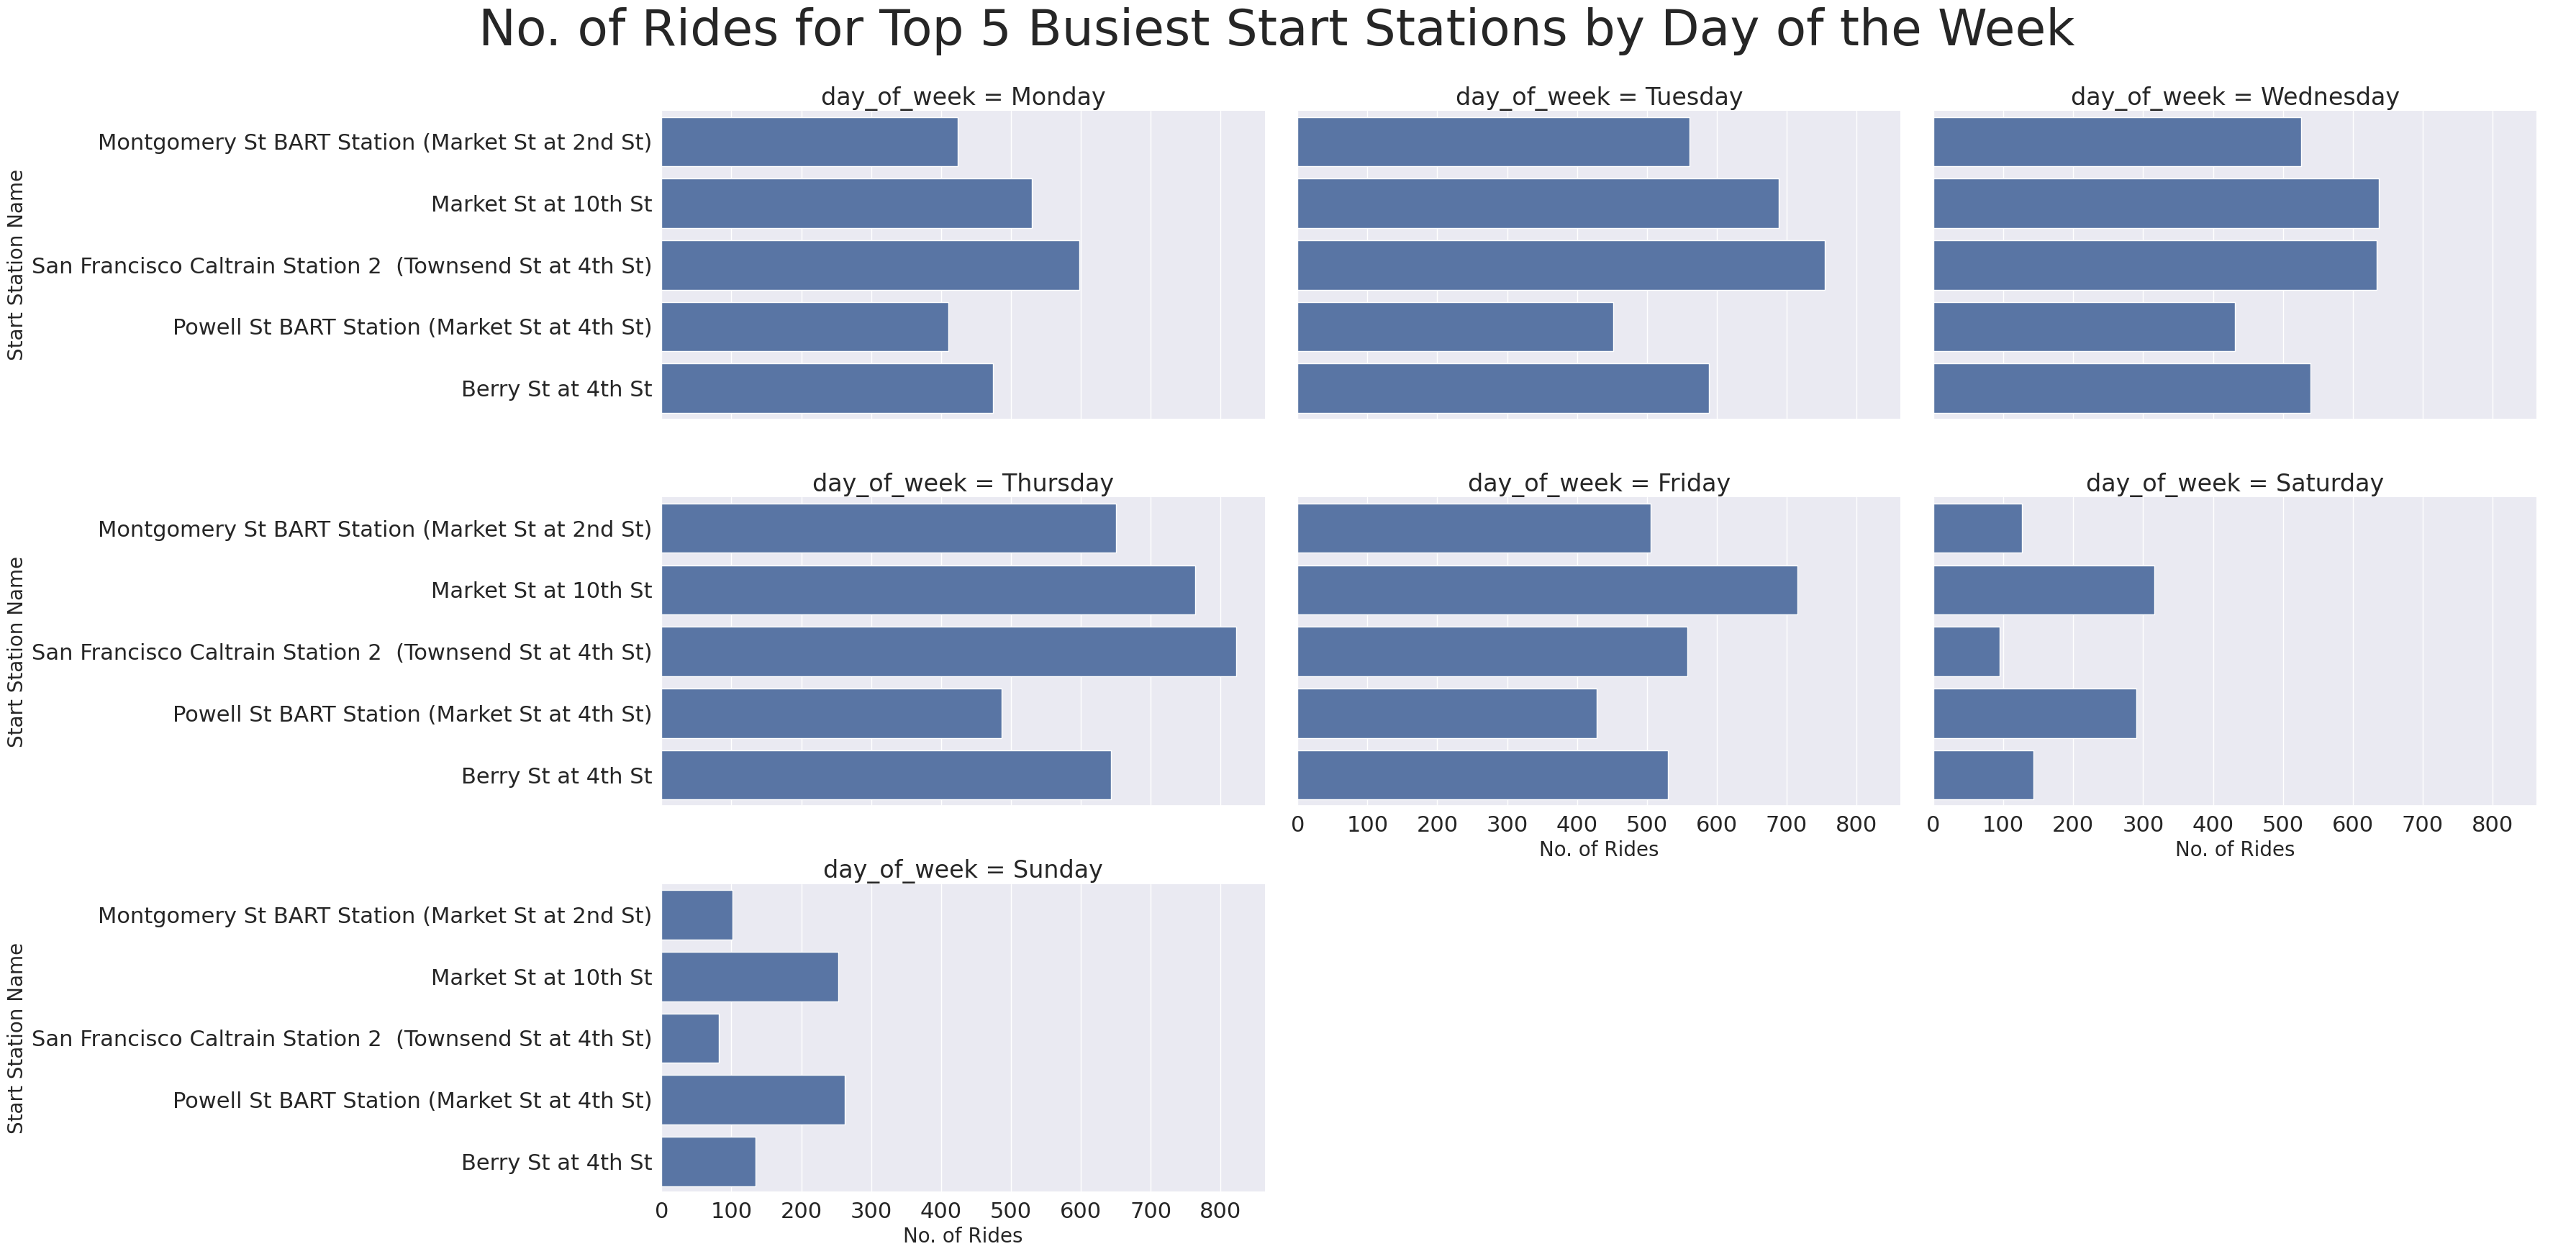

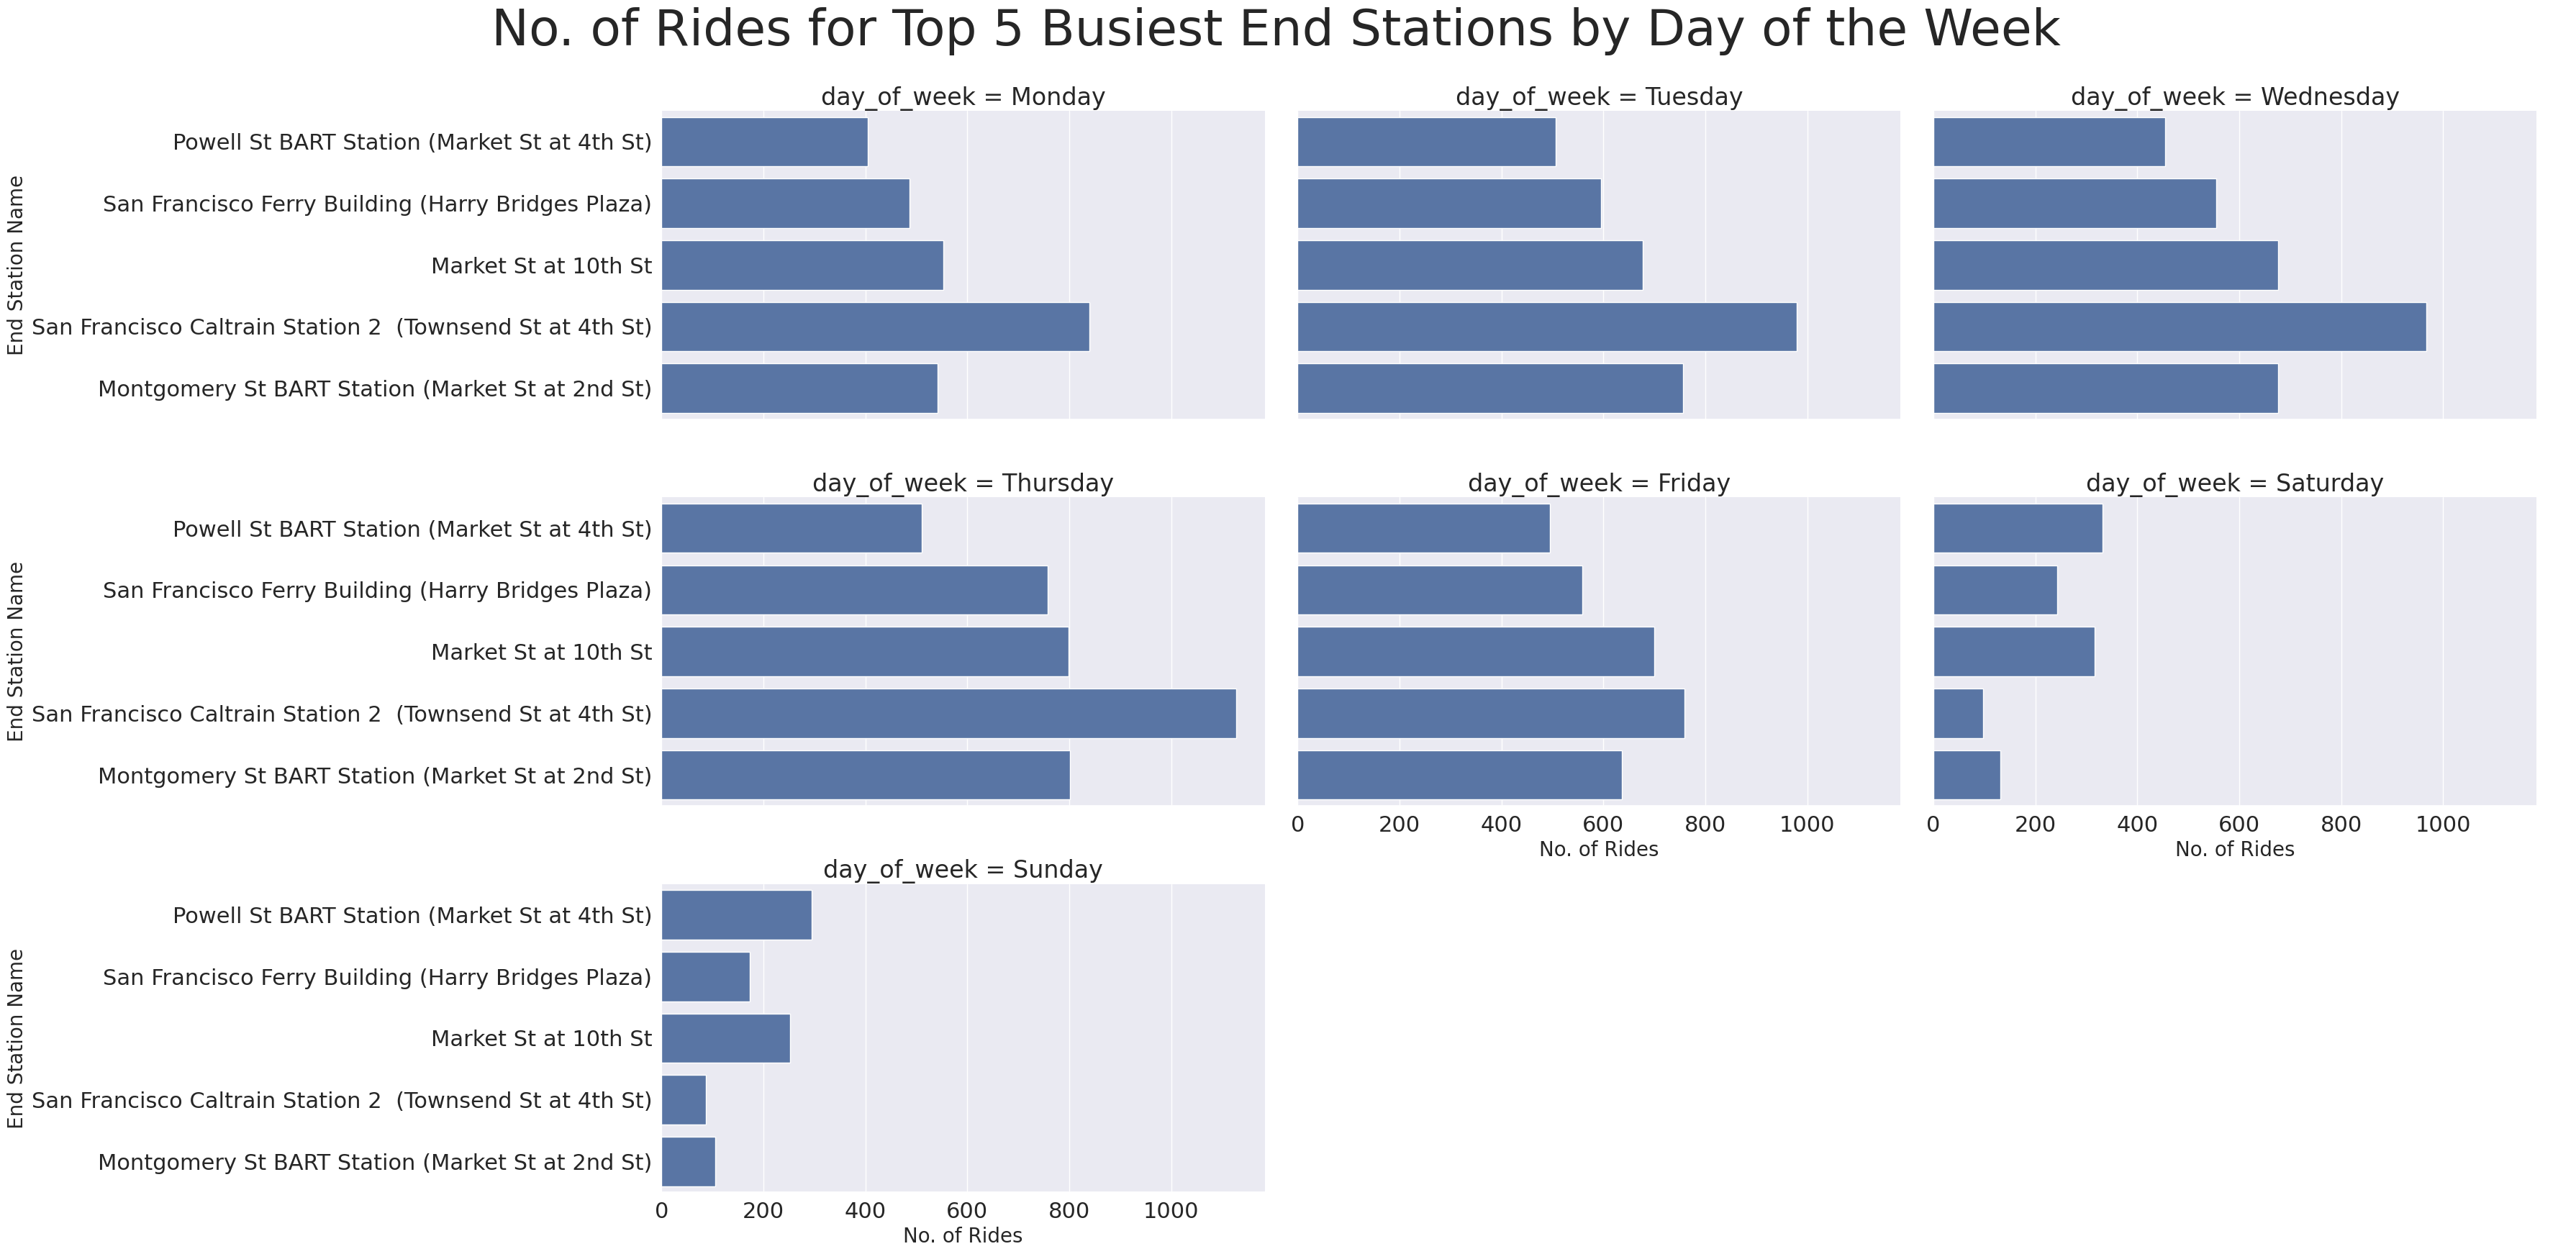

In [75]:

# Set plot size and style
sns.set(font_scale=2)  # Increase font size for better readability
sns.set_palette('deep')  # Choose a color palette for the plots

# Plot Matrix for Top 5 Busiest Start Stations by Day of the Week (Without Hourly Breakdown)
g_start = sns.catplot(data=df[df['start_station_name'].isin(top_5_start_stations)],  # Filter data to include only the top 5 start stations
                      y='start_station_name', col='day_of_week', kind='count',  # Count the rides per start station by day of the week
                      height=6, aspect=2, col_wrap=3, col_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Define the plot layout and day order

# Customize the appearance of the start station plot
g_start.set_xlabels('No. of Rides', fontsize=20)  # Label for the x-axis
g_start.set_ylabels('Start Station Name', fontsize=20)  # Label for the y-axis
g_start.fig.subplots_adjust(top=0.9)  # Adjust layout for better title placement
g_start.fig.suptitle('No. of Rides for Top 5 Busiest Start Stations by Day of the Week', fontsize=50)  # Add title to the plot

# Plot Matrix for Top 5 Busiest End Stations by Day of the Week (Without Hourly Breakdown)
g_end = sns.catplot(data=df[df['end_station_name'].isin(top_5_end_stations)],  # Filter data to include only the top 5 end stations
                    y='end_station_name', col='day_of_week', kind='count',  # Count the rides per end station by day of the week
                    height=6, aspect=2, col_wrap=3, col_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Define the plot layout and day order

# Customize the appearance of the end station plot
g_end.set_xlabels('No. of Rides', fontsize=20)  # Label for the x-axis
g_end.set_ylabels('End Station Name', fontsize=20)  # Label for the y-axis
g_end.fig.subplots_adjust(top=0.9)  # Adjust layout for better title placement
g_end.fig.suptitle('No. of Rides for Top 5 Busiest End Stations by Day of the Week', fontsize=50)  # Add title to the plot

# Show the plots
plt.show()


### Visualization :No. of Rides for Top 5 Busiest Start/End Stations by Hour of the Day (Plot Matrix)

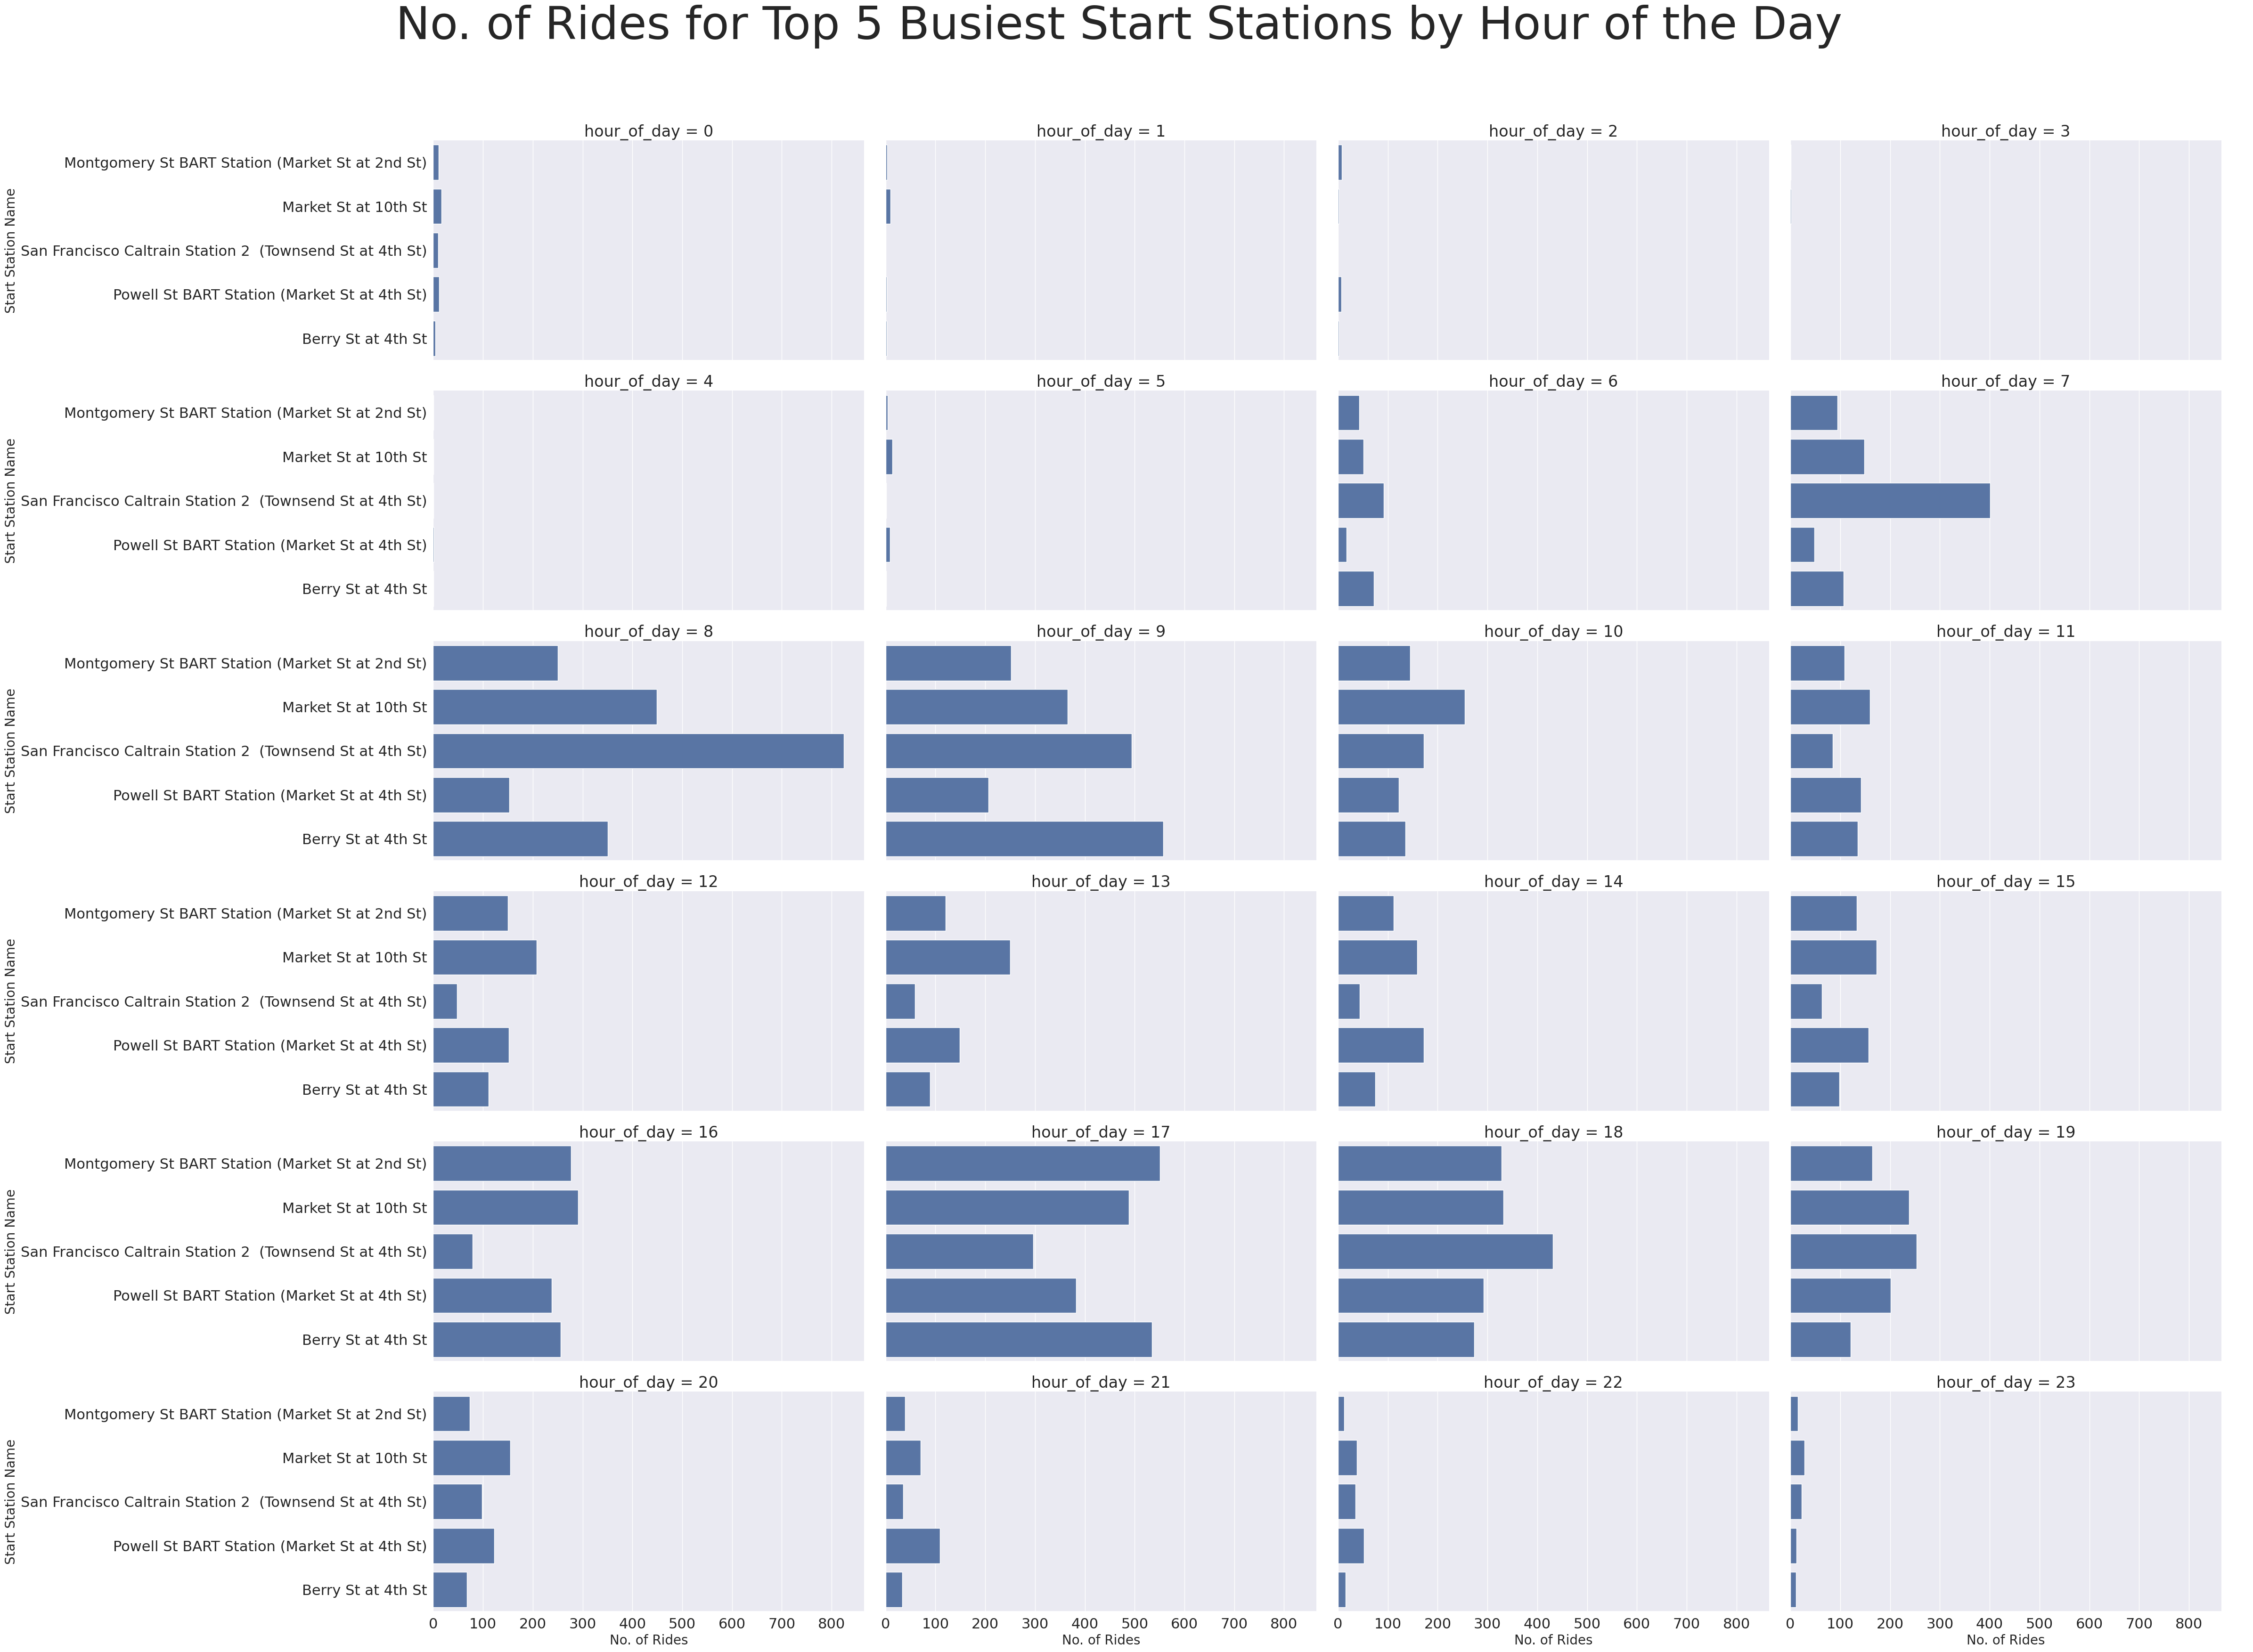

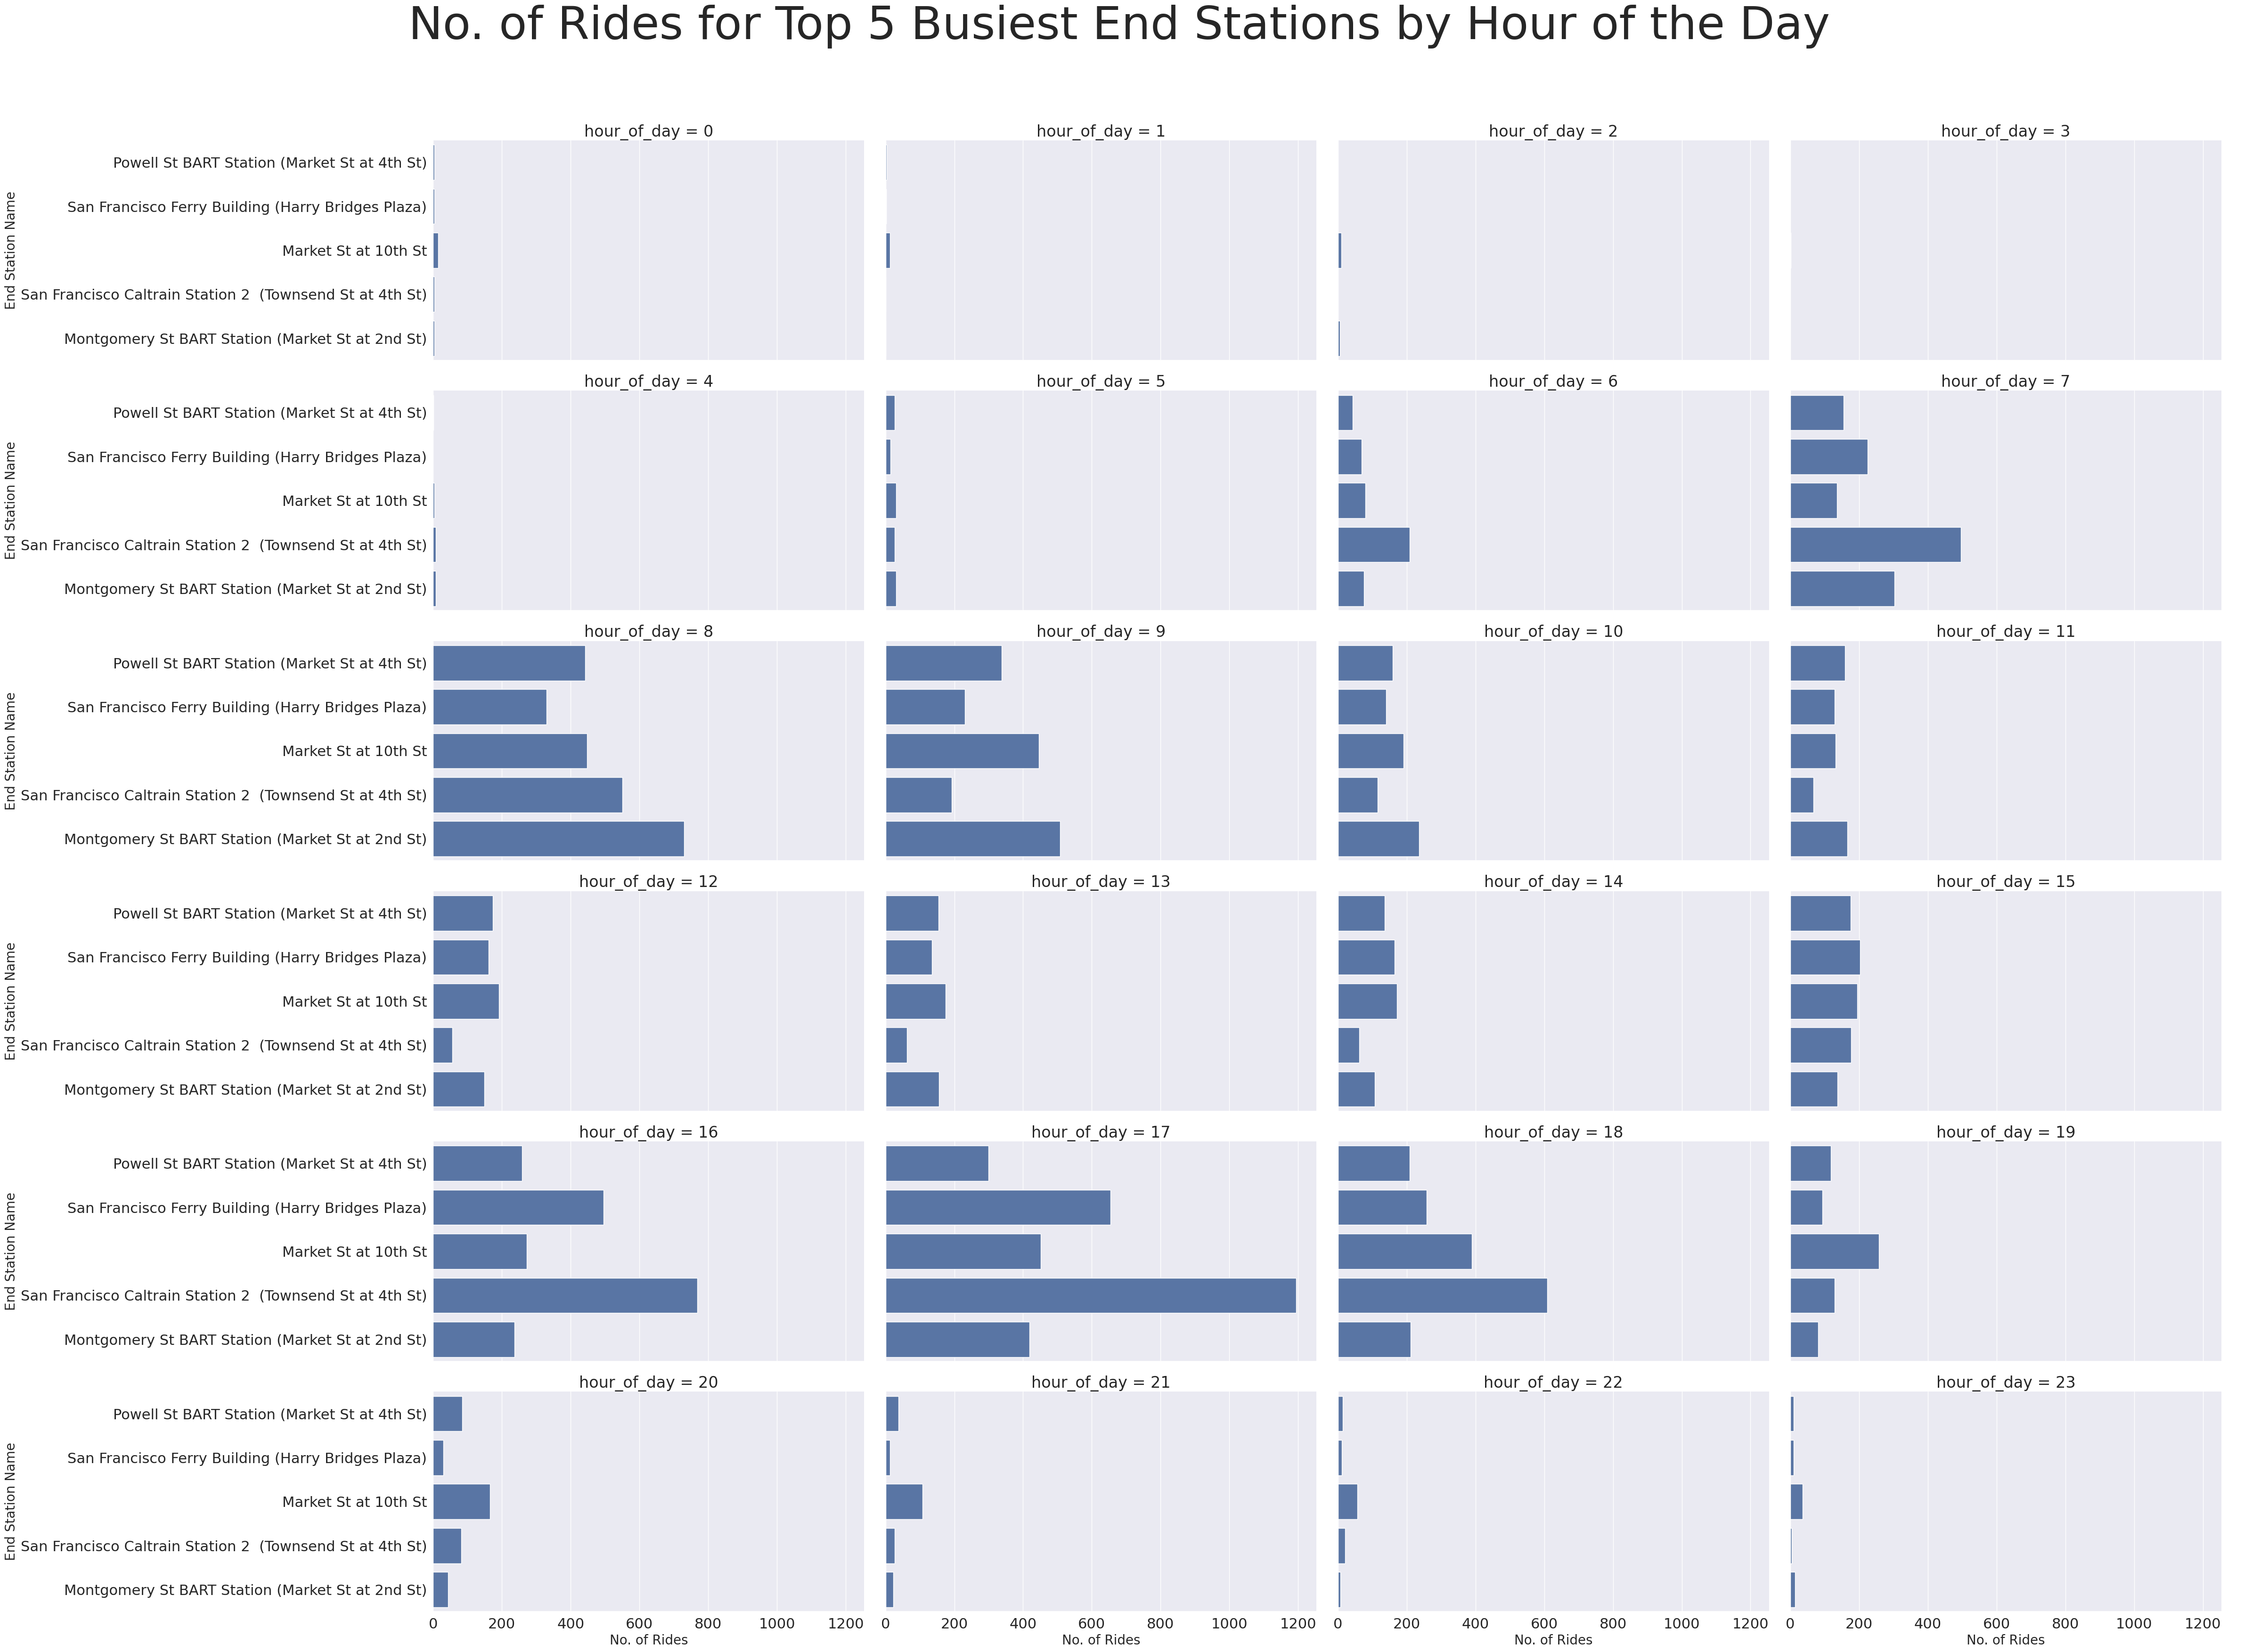

In [77]:

# Set plot size and style
sns.set(font_scale=2)  # Increase font size for better readability
sns.set_palette('deep')  # Choose a color palette for the plots

# Plot Matrix for Top 5 Busiest Start Stations by Hour (Grouped by Hour)
g_start_hour = sns.catplot(data=df[df['start_station_name'].isin(top_5_start_stations)],  # Filter data to include only the top 5 start stations
                           y='start_station_name', col='hour_of_day', kind='count',  # Count the rides per start station by hour of the day
                           height=6, aspect=2, col_wrap=4, col_order=range(0, 24))  # Define the plot layout for hours (0 to 23)

# Customize the appearance of the start station by hour plot
g_start_hour.set_xlabels('No. of Rides', fontsize=20)  # Label for the x-axis
g_start_hour.set_ylabels('Start Station Name', fontsize=20)  # Label for the y-axis
g_start_hour.fig.subplots_adjust(top=0.9)  # Adjust layout for better title placement
g_start_hour.fig.suptitle('No. of Rides for Top 5 Busiest Start Stations by Hour of the Day', fontsize=70)  # Add title to the plot

# Plot Matrix for Top 5 Busiest End Stations by Hour (Grouped by Hour)
g_end_hour = sns.catplot(data=df[df['end_station_name'].isin(top_5_end_stations)],  # Filter data to include only the top 5 end stations
                         y='end_station_name', col='hour_of_day', kind='count',  # Count the rides per end station by hour of the day
                         height=6, aspect=2, col_wrap=4, col_order=range(0, 24))  # Define the plot layout for hours (0 to 23)

# Customize the appearance of the end station by hour plot
g_end_hour.set_xlabels('No. of Rides', fontsize=20)  # Label for the x-axis
g_end_hour.set_ylabels('End Station Name', fontsize=20)  # Label for the y-axis
g_end_hour.fig.subplots_adjust(top=0.9)  # Adjust layout for better title placement
g_end_hour.fig.suptitle('No. of Rides for Top 5 Busiest End Stations by Hour of the Day', fontsize=70)  # Add title to the plot

# Show the plots
plt.show()


## (Duration and Distance)

In this analysis, we aim to explore the relationship between the duration of bike trips and the distance traveled. We will examine whether factors such as member demographics influence these aspects and look at the correlation between the two metrics—duration and distance.

### Analysis Goals
To check if there is a significant relationship between duration and distance.
To explore if member demographics (such as age, gender, and user type) have an influence on the duration and distance.

### Findings and Key Insights
##### Positive Relationship Between Duration and Distance:
The analysis reveals that there is a positive linear correlation between trip duration and distance. In other words, trips that last longer tend to cover greater distances, which is a logical conclusion as longer trips typically involve more travel.
<br>
##### Member Demographics Influence:
Although duration and distance seem to be related, member demographics (such as age or gender) do not show significant relationships with these two variables. It suggests that factors such as user experience or location preferences have a stronger impact on trip characteristics than demographic factors like age or gender.
<br>
##### User Type (Subscribers vs. Casual Users):
Subscribers tend to have more consistent trip durations and distances compared to casual users. Casual users might engage in shorter or more recreational rides, while subscribers likely use the system for daily commuting, resulting in longer and more consistent distances and durations.

### Visualizations : Heatmap (correlation between trip_duration and distance)

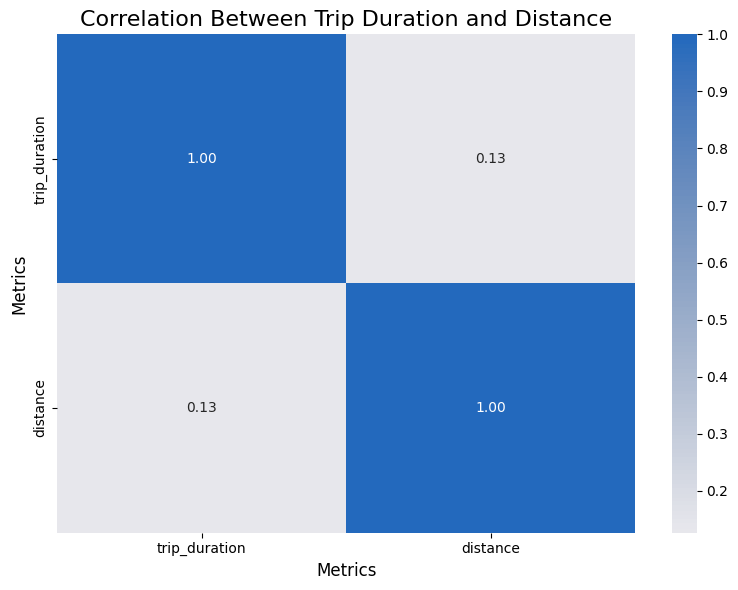

In [6]:
# Calculate correlation between trip_duration and distance
correlation_data = df[['trip_duration', 'distance']].corr()

# Create the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_data, 
    annot=True, 
    fmt='.2f', 
    cmap='vlag_r', 
    center=0
)

# Add a title and labels for better clarity
plt.title('Correlation Between Trip Duration and Distance', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.tight_layout()

# Show the heatmap
plt.show()

Duration and Distance are positively correlated, meaning longer trips tend to cover more distance.

### Visualizations : Boxplot for Duration by User Type

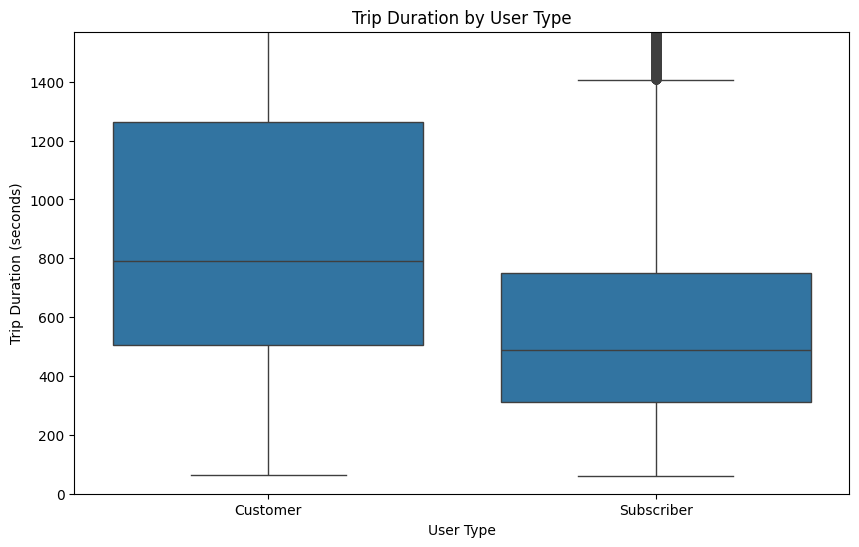

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='user_type', y='duration_sec', data=df)
plt.title("Trip Duration by User Type")
plt.xlabel("User Type")
plt.ylabel("Trip Duration (seconds)")
plt.ylim(0, df['duration_sec'].quantile(0.95))  # Limit to the 95th percentile to reduce the effect of outliers
plt.show()

Member demographics do not have a significant impact on the relationship between duration and distance, indicating that trip characteristics are more influenced by factors such as trip purpose

### Visualizations :Boxplot for Distance by User Type

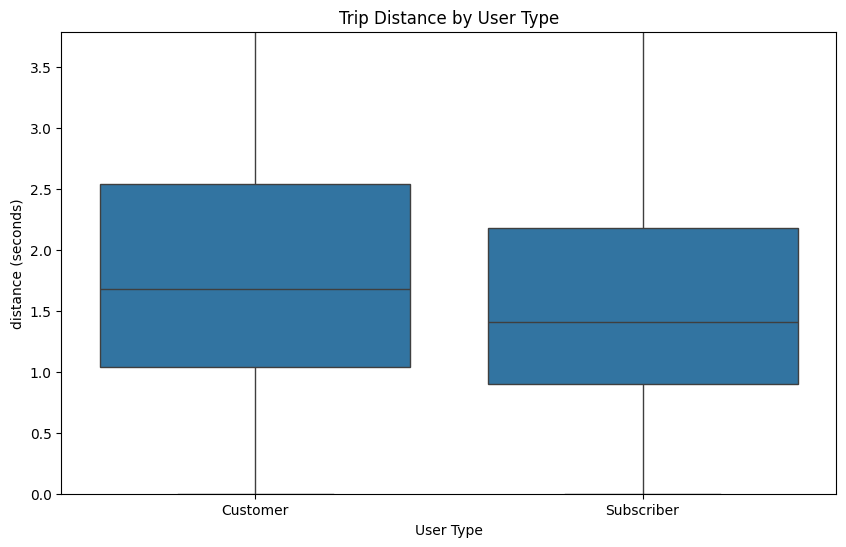

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='user_type', y='distance', data=df)
plt.title("Trip Distance by User Type")
plt.xlabel("User Type")
plt.ylabel("distance (seconds)")
plt.ylim(0, df['distance'].quantile(0.95))  # Limit to the 95th percentile to reduce the effect of outliers
plt.show()

User type plays a role, with subscribers showing more consistent trip patterns compared to casual users.